In [3]:
tempvar = Array(Any, 4)
fill!(tempvar, "hello ... word")

4-element Array{Any,1}:
 "hello ... word"
 "hello ... word"
 "hello ... word"
 "hello ... word"

In [4]:
fill!(tempvar, 777)

4-element Array{Any,1}:
 777
 777
 777
 777

In [6]:
function approxcos(x)
    outval = Array(Any, size(x))
    
    ii = 0
    for aa in x
        y = 1 - aa^2/2 + aa^4/24 - aa^6/720 + aa^8/(56*720)
        ii += 1
        outval[ii] = y
    end
    return outval
end

approxcos (generic function with 1 method)

In [7]:
x1 = 6rand(10)
x2 = linspace(0, 6, 200)

linspace(0.0,6.0,200)

In [8]:
y1 = approxcos(x1)
y2 = cos(x2)

200-element Array{Float64,1}:
 1.0     
 0.999546
 0.998182
 0.995912
 0.992736
 0.988658
 0.983681
 0.97781 
 0.971051
 0.963408
 0.95489 
 0.945504
 0.935258
 ⋮       
 0.816864
 0.833882
 0.850142
 0.865629
 0.880329
 0.894229
 0.907317
 0.919579
 0.931006
 0.941586
 0.951311
 0.96017 

In [9]:
plot(x1, y1)

LoadError: LoadError: UndefVarError: plot not defined
while loading In[9], in expression starting on line 1

In [10]:
using Plots


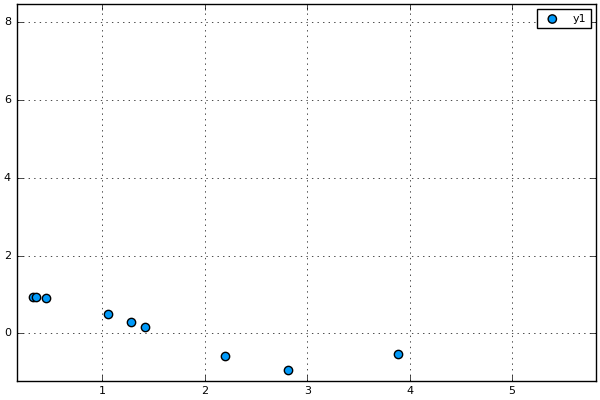

In [12]:
plot(x1, y1, line = :scatter)


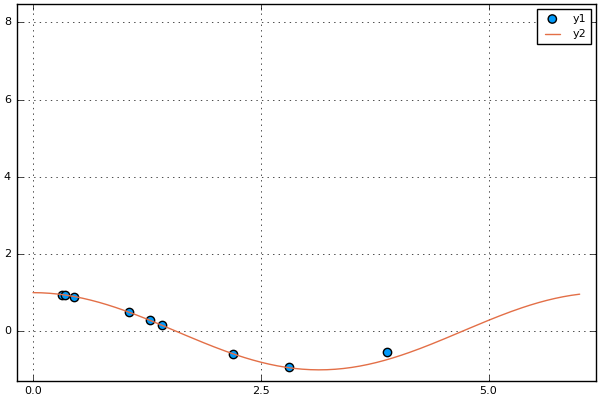

In [13]:
plot!(x2, y2)

In [14]:
EVDdata = readdlm("wikipediaEVDdatesconverted.csv", ',')
tvalsfromdata = EVDdata[:,1]
totalcasesfromdata = EVDdata[:, 2]

54-element Array{Any,1}:
 28637
 28634
 28635
 28607
 28539
 28476
 28454
 28388
 28295
 28220
 28147
 28073
 27952
     ⋮
  1835
  1437
  1201
   982
   779
   528
   309
   260
   239
   176
   130
    49

In [15]:
function updateSIR(popnvector)
    susceptibles = popnvector[1];
    infecteds    = popnvector[2];
    removeds     = popnvector[3];
    newS = susceptibles - lambda*susceptibles*infecteds*dt
    newI = infecteds + lambda*susceptibles*infecteds*dt - gam*infecteds*dt
    newR = removeds + gam*infecteds*dt
    return [newS newI newR]
end


updateSIR (generic function with 1 method)


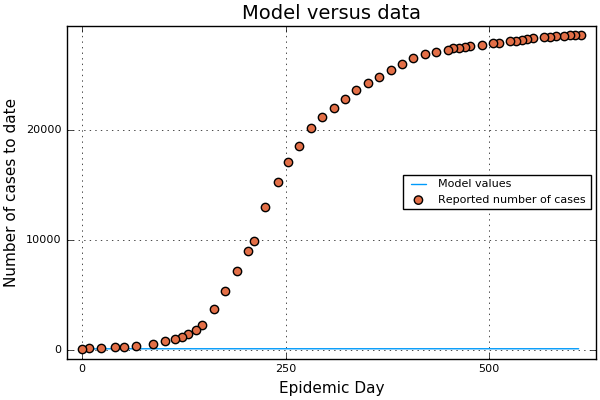

In [26]:
lambda = 1.47*10^(-6.)
gam = 1/8
dt = 0.5
tfinal = 610.;

s0 = 3.5*10.^4.
i0 = 50.
r0 = 0.

nsteps = round(Int64, tfinal/dt)
resultvals = Array(Float64, nsteps + 1, 3)
timevec = Array(Float64, nsteps + 1)
resultvals[1, :] = [s0, i0, r0]
timevec[1] = 0.

for step = 1:nsteps
    resultvals[step + 1, :] = updateSIR(resultvals[step, :])
    timevec[step + 1] = timevec[step] + dt
end

ivals = resultvals[:, 2]
rvals = resultvals[:, 3]
cvals = ivals + rvals

plot(timevec, cvals,
label = "Model values",
xlabel = "Epidemic Day",
ylabel = "Number of cases to date",
title = "Model versus data")

plot!(tvalsfromdata, totalcasesfromdata,
legend = :right,
line = :scatter,
label = "Reported number of cases")


In [27]:
using Plots
f(x) = 5 * x^2 + 3 * x - 20

f (generic function with 1 method)


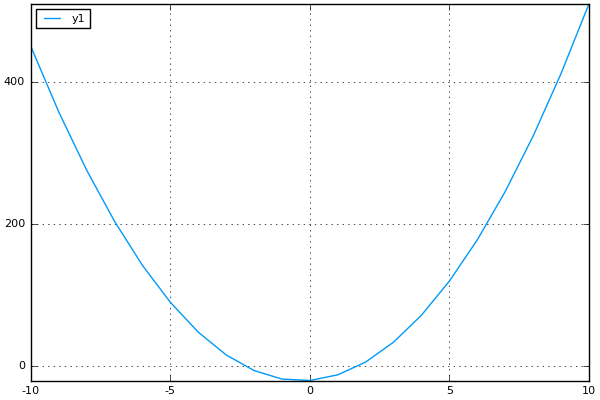

In [28]:
plot(f, -10:10)


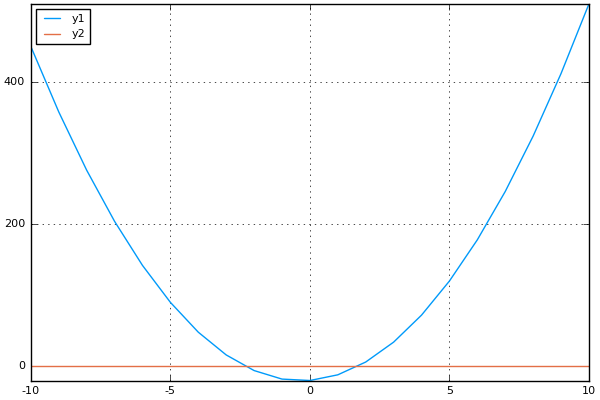

In [29]:
plot!(zero, -10, 10)


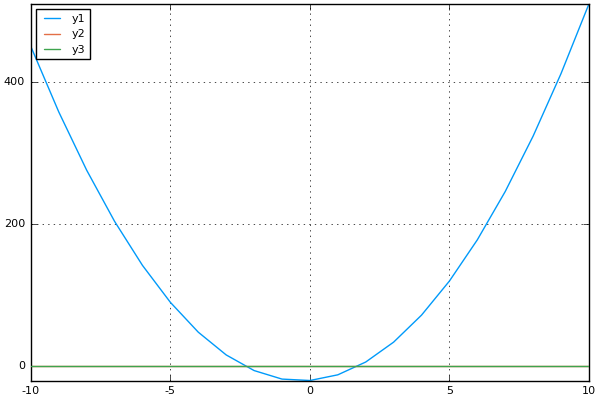

In [30]:
plot!(zero, -10:10)

In [31]:
plot(0, -10:10)

LoadError: LoadError: DivideError: integer division error
while loading In[31], in expression starting on line 1